# Neural Network

### Library yang dibutuhkan

Di sini menggunakan Framework Tensorflow
Library yang akan digunakan adalah **pandas, numpy, matplotlib, seaborn, sklearn, dan tensorflow**. Jika belum diinstall, silahkan diinstal dahulu dengan mengetikkan `pip install nama-library` pada anaconda prompt.

note: Library tensorflow cukup besar sizenya, sekitar 300MB.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

### Sedikit penjelasan mengenai Deep Neural Network

**Neural network** adalah sebuah model yang berisikan node atau neuron atau perceptron yang saling terhubung dengan dengan node lain melalui koneksi yang disebut penimbang atau weight. Neural network terbagi menjadi tiga bagian utama:
Input Layer
Hidden Layer
Output Layer

Deep Neural Network (DNN) adalah perluasan dari metode neural network. Perbedaannya adalah dalam DNN mempunyai **lebih dari dua hidden layer**. 
<img src="figure/dnn.png">

### Activation Function

Activation function berfungsi untuk menentukan apakah neuron tersebut harus aktif atau tidak.
Activation yang biasanya digunakan:

    sigmoid = untuk binary classification
    tanh    = untuk binary classification
    softmax = untuk categorical classification
    ReLU
   lainnya bisa dilihat di `https://en.wikipedia.org/wiki/Activation_function`

### Loss Function 

Loss Functioin berfungsi untuk mengukur seberapa besar nilai error yang dihasilkan dari output terhadap nilai aslinya.
Loss function yang biasa digunakan adalah `binary_corssentropy`, `categorical_crossentropy` -> untuk klasifikasi. dan `mse` untuk regresi.

### Backpropagation

Mudahnya backpropagation adalah suatu cara untuk menyesuaikan penimbang dan bias yang dihasilkan untuk meminimalisir error pada output.
<img src="figure/nn.png">
Caranya adalah
1. Menghitung nilai error menggunakan loss function
2. Hitung gradien dari loss funtion tersebut
<img src="figure/loss_opt.png">
<img src="figure/loss_opt2.png">
3. Update parameter bias dan penimbang dari hasil gradien yang didapatkan

nb: belum terlalu paham dengan backpropagation

Optimizer yang biasa digunakan adalah `adam`, `rmsprop`

Penjelasannya juga bisa dilihat di sini `https://medium.com/@samuelsena/pengenalan-deep-learning-part-3-backpropagation-algorithm-720be9a5fbb8` dan bisa juga search sendiri ya

# Contoh 1 Regression

Import Data

In [2]:
df = pd.read_csv('california_housing_sklearn.csv')

In [3]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Kita akan meregresikan SalePrice (Y) dengan variable independent MedInc, HouseAge, AveRooms, AveBedrms, Population, dan AveOccup.

In [4]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
SalePrice     0
dtype: int64

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
SalePrice,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


#### Distribution Plot dari Sale Price

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

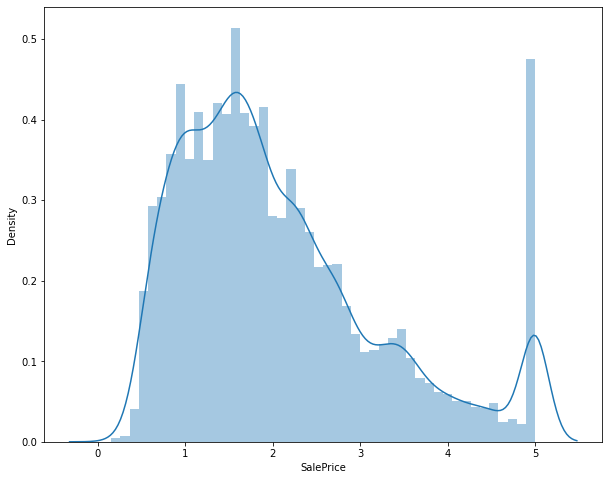

In [6]:
plt.figure(figsize=(10,8))
sns.distplot(df['SalePrice'])

#### Korelasi

In [7]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
SalePrice,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [8]:
df.corr()['SalePrice'].sort_values()

Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
SalePrice     1.000000
Name: SalePrice, dtype: float64

#### Scatter Plot

<AxesSubplot:xlabel='AveRooms', ylabel='SalePrice'>

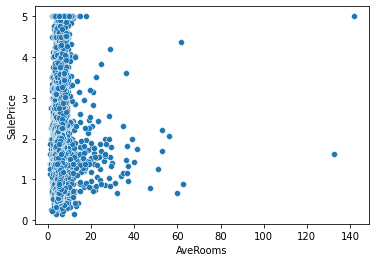

In [9]:
sns.scatterplot(x='AveRooms', y='SalePrice', data=df)

<AxesSubplot:xlabel='Longitude', ylabel='Latitude'>

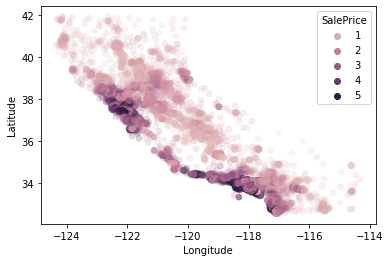

In [10]:
sns.scatterplot(x='Longitude', y='Latitude', data=df, edgecolor=None, alpha=0.2, hue='SalePrice')

### Creating a model

In [11]:
data=df.drop(['Longitude', 'Latitude'], axis=1) #Membuang variabel Longitude dan Latitude #axis=1 untuk kolom, axis=0 untuk baris

In [12]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,SalePrice
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,3.422


In [13]:
X = data.drop('SalePrice', axis=1).values
y = data['SalePrice']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Split data menjadi data training dan testing

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=221810445)

#### Normalizing (MinMaxScaler)

In [16]:
from sklearn.preprocessing import MinMaxScaler

In [17]:
scaler = MinMaxScaler()

In [18]:
X_train= scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
X_train.shape #ada 6 kolom dan 14449 baris

(14448, 6)

### Creating Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [22]:
model = Sequential()

model.add(Dense(6,activation='relu')) #input layer
model.add(Dense(6,activation='relu')) #hidden layer
model.add(Dense(1)) #output layer

model.compile(optimizer='adam',loss='mse') 

Banyaknya hidden layer itu tidak ada patokannya, akan tetapi semakin rumit permasalahan, semakin banyak hidden layer. 
`https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw`

### Training Model 

`batch size` adalah jumlah batch datanya (jadi datanya dipecah menjadi beberapa batch), semakin sedikit jumlah batch semakin lama runningnya. Batch berguna untuk data yang berukuran besar. Jumlah batch biasanya 2^n.

`epochs` adalah iterasi untuk update penimbang dan bias. 1 epoch sama dengan menjalankan network dari input sampai ke output. epoch ke 2 (iterasi ke-2) meng-update penimbang dan bias kemudian menjalankan networknya lagi, dst. Standarnya berapa? kira-kira aja wkwkwk nnti diganti2 aja jumlahnya

In [23]:
model.fit(x=X_train,
          y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=32,epochs=400)

#kalau ada error, coba di bagian deklarasi variabel X dan y, belakangnya ditambahin/diilangin values(), yg ini misal e X = data.drop('SalePrice', axis=1).values()

Epoch 1/400
452/452 [==============================] - 1s 2ms/step - loss: 2.3362 - val_loss: 1.0455
Epoch 2/400
452/452 [==============================] - 1s 1ms/step - loss: 0.9626 - val_loss: 0.8832
Epoch 3/400
452/452 [==============================] - 1s 1ms/step - loss: 0.8037 - val_loss: 0.7338
Epoch 4/400
452/452 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6705
Epoch 5/400
452/452 [==============================] - 1s 1ms/step - loss: 0.6615 - val_loss: 0.6497
Epoch 6/400
452/452 [==============================] - 1s 2ms/step - loss: 0.6513 - val_loss: 0.6493
Epoch 7/400
452/452 [==============================] - 0s 1ms/step - loss: 0.6468 - val_loss: 0.6419
Epoch 8/400
452/452 [==============================] - 1s 1ms/step - loss: 0.6437 - val_loss: 0.6374
Epoch 9/400
452/452 [==============================] - 0s 997us/step - loss: 0.6424 - val_loss: 0.6360
Epoch 10/400
452/452 [==============================] - 1s 1ms/step - loss: 0.6398 - val_

452/452 [==============================] - 0s 849us/step - loss: 0.4843 - val_loss: 0.4886
Epoch 81/400
452/452 [==============================] - 0s 896us/step - loss: 0.4838 - val_loss: 0.4878
Epoch 82/400
452/452 [==============================] - 0s 825us/step - loss: 0.4831 - val_loss: 0.4985
Epoch 83/400
452/452 [==============================] - 0s 834us/step - loss: 0.4816 - val_loss: 0.4885
Epoch 84/400
452/452 [==============================] - 0s 909us/step - loss: 0.4817 - val_loss: 0.4892
Epoch 85/400
452/452 [==============================] - 0s 849us/step - loss: 0.4812 - val_loss: 0.4864
Epoch 86/400
452/452 [==============================] - 0s 858us/step - loss: 0.4790 - val_loss: 0.4939
Epoch 87/400
452/452 [==============================] - 0s 863us/step - loss: 0.4805 - val_loss: 0.4827
Epoch 88/400
452/452 [==============================] - 0s 843us/step - loss: 0.4775 - val_loss: 0.4926
Epoch 89/400
452/452 [==============================] - 0s 916us/step - loss:

452/452 [==============================] - 0s 909us/step - loss: 0.4496 - val_loss: 0.4534
Epoch 159/400
452/452 [==============================] - 0s 863us/step - loss: 0.4487 - val_loss: 0.4584
Epoch 160/400
452/452 [==============================] - 0s 852us/step - loss: 0.4495 - val_loss: 0.4523
Epoch 161/400
452/452 [==============================] - 0s 891us/step - loss: 0.4499 - val_loss: 0.4544
Epoch 162/400
452/452 [==============================] - 0s 938us/step - loss: 0.4483 - val_loss: 0.4515
Epoch 163/400
452/452 [==============================] - 0s 856us/step - loss: 0.4481 - val_loss: 0.4496
Epoch 164/400
452/452 [==============================] - 0s 909us/step - loss: 0.4478 - val_loss: 0.4587
Epoch 165/400
452/452 [==============================] - 0s 838us/step - loss: 0.4502 - val_loss: 0.4513
Epoch 166/400
452/452 [==============================] - 0s 969us/step - loss: 0.4502 - val_loss: 0.4505
Epoch 167/400
452/452 [==============================] - 0s 940us/ste

Epoch 237/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4402 - val_loss: 0.4441
Epoch 238/400
452/452 [==============================] - 1s 1ms/step - loss: 0.4405 - val_loss: 0.4408
Epoch 239/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4402 - val_loss: 0.4434
Epoch 240/400
452/452 [==============================] - 1s 1ms/step - loss: 0.4405 - val_loss: 0.4425
Epoch 241/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4400 - val_loss: 0.4443
Epoch 242/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4407 - val_loss: 0.4500
Epoch 243/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4394 - val_loss: 0.4438
Epoch 244/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4396 - val_loss: 0.4426
Epoch 245/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4397 - val_loss: 0.4409
Epoch 246/400
452/452 [==============================] - 0s 1ms/step - lo

452/452 [==============================] - 0s 1ms/step - loss: 0.4366 - val_loss: 0.4358
Epoch 317/400
452/452 [==============================] - 0s 989us/step - loss: 0.4347 - val_loss: 0.4359
Epoch 318/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4366 - val_loss: 0.4397
Epoch 319/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4341 - val_loss: 0.4425
Epoch 320/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4359 - val_loss: 0.4510
Epoch 321/400
452/452 [==============================] - 0s 1ms/step - loss: 0.4334 - val_loss: 0.4419
Epoch 322/400
452/452 [==============================] - 0s 947us/step - loss: 0.4332 - val_loss: 0.4521
Epoch 323/400
452/452 [==============================] - 0s 874us/step - loss: 0.4374 - val_loss: 0.4544
Epoch 324/400
452/452 [==============================] - 0s 837us/step - loss: 0.4344 - val_loss: 0.4421
Epoch 325/400
452/452 [==============================] - 0s 896us/step - loss: 

452/452 [==============================] - 0s 993us/step - loss: 0.4330 - val_loss: 0.4329
Epoch 395/400
452/452 [==============================] - 0s 982us/step - loss: 0.4326 - val_loss: 0.4336
Epoch 396/400
452/452 [==============================] - 0s 852us/step - loss: 0.4330 - val_loss: 0.4525
Epoch 397/400
452/452 [==============================] - 0s 857us/step - loss: 0.4330 - val_loss: 0.4346
Epoch 398/400
452/452 [==============================] - 0s 969us/step - loss: 0.4318 - val_loss: 0.4366
Epoch 399/400
452/452 [==============================] - 0s 936us/step - loss: 0.4316 - val_loss: 0.4369
Epoch 400/400
452/452 [==============================] - 0s 953us/step - loss: 0.4315 - val_loss: 0.4397


hasil di atas bakal beda2 klo di run ulang yak, karna inisialisasi dan updating nilai penimbang dan bias itu random

membandingkan loss dengan validation loss

In [24]:
losses = pd.DataFrame(model.history.history)

In [25]:
losses

,loss,val_loss
0,2.336239,1.045455
1,0.962562,0.883230
2,0.803659,0.733810
3,0.696442,0.670474
4,0.661541,0.649681
...,...,...
395,0.432976,0.452530
396,0.433019,0.434643
397,0.431773,0.436584
398,0.431601,0.436938


<AxesSubplot:>

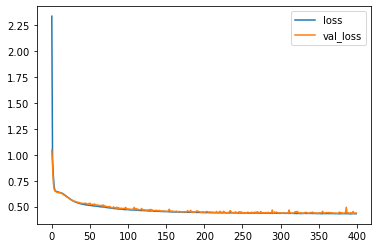

In [26]:
losses.plot()

Jika garis oranye semakin lama semakin ke atas, itu berarti overfitting. Jika garis biru yang ke atas, berarti underfitting
Beberapa cara mengatasinya yaitu mengubuah jumlah epochs, menambah/mengurangi jumlah hidden layer, menambah/mengurangi perceptron/node/neuron.

### Model Evaluation 

In [27]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [28]:
X_test

array([[0.24712763, 0.33333333, 0.07578484, 0.09767782, 0.00238235,
        0.00112374],
       [0.17579068, 0.62745098, 0.02492117, 0.02775877, 0.03615572,
        0.00171913],
       [0.17912167, 0.47058824, 0.02131895, 0.02652413, 0.15569383,
        0.00439971],
       ...,
       [0.11674322, 0.82352941, 0.02469675, 0.0268154 , 0.05092632,
        0.00187474],
       [0.16959766, 0.01960784, 0.02578037, 0.02685689, 0.04492839,
        0.00124809],
       [0.1200811 , 0.90196078, 0.02225972, 0.02197632, 0.02183357,
        0.00229658]])

In [29]:
predictions = model.predict(X_test)

In [30]:
mean_absolute_error(y_test,predictions) #mean absolute error antara y test (nilai asli) dengan y prediction

0.4710510269159802

In [31]:
np.sqrt(mean_squared_error(y_test,predictions)) #root mean square error antara y test (nilai asli) dengan y prediction

0.6631354057392025

In [32]:
explained_variance_score(y_test,predictions) #nilai varians yang bisa dijelaskan oleh model

0.6747715758344321

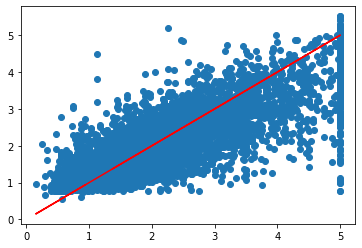

In [33]:
# Our predictions
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [34]:
errors = y_test.values.reshape(6192, 1) - predictions

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

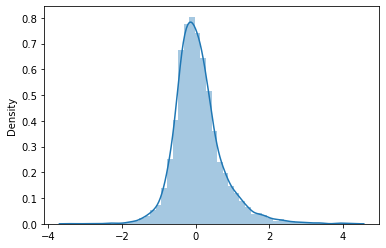

In [35]:
sns.distplot(errors)

### Predicting

In [36]:
single_house = df.drop(['SalePrice','Latitude', 'Longitude'],axis=1).iloc[0]
#iloc[0] untuk mengambil data pada baris pertama

In [37]:
single_house

MedInc          8.325200
HouseAge       41.000000
AveRooms        6.984127
AveBedrms       1.023810
Population    322.000000
AveOccup        2.555556
Name: 0, dtype: float64

In [38]:
single_house = single_house.values.reshape(-1, 6) 

Kita reshape menjadi bentuk array

-1 berarti semua variabel ikut

6 mksdnya banyak variabel

In [39]:
single_house

array([[  8.3252    ,  41.        ,   6.98412698,   1.02380952,
        322.        ,   2.55555556]])

In [40]:
single_house = scaler.transform(single_house) #minmaxscaler

In [41]:
model.predict(single_house)

array([[4.6631284]], dtype=float32)

In [42]:
df.head(1)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,SalePrice
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526


Harga aslinya 4.526, harga yg dipredict 4.3592577
mayan lah ya